In [1]:
# install the lxml to read html pages

!conda install -c conda-forge lxml --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lxml-4.4.1                 |   py36h7ec2d77_0         1.6 MB  conda-forge

The following packages will be UPDATED:

    lxml: 4.2.5-py37hefd8a0e_0 --> 4.4.1-py36h7ec2d77_0 conda-forge


lxml-4.4.1           | 1.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


# Objective of this program is to find the right Neighborhood in Central Toronto to start a Pizza Restaurant #

__Install the required libraries__

In [2]:
#install the required libraries

import numpy as np
import pandas as pd
import lxml
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
%matplotlib inline
import matplotlib.pyplot as plt


__Read the html page and store the required rows in a dataframe__

In [3]:
# read the html page
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

# read the table
df = df[0]

# remove all Not assigned borough rows
df = df[df['Borough'] != 'Not assigned']

# Select only Central Toronto Borough for the analysis
df = df[df['Borough'] == 'Central Toronto']

In [4]:
df

,Postcode,Borough,Neighbourhood
144,M4N,Central Toronto,Lawrence Park
145,M5N,Central Toronto,Roselawn
156,M4P,Central Toronto,Davisville North
157,M5P,Central Toronto,Forest Hill North
158,M5P,Central Toronto,Forest Hill West
168,M4R,Central Toronto,North Toronto West
169,M5R,Central Toronto,The Annex
170,M5R,Central Toronto,North Midtown
171,M5R,Central Toronto,Yorkville
183,M4S,Central Toronto,Davisville


In [5]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
df

,Postcode,Borough,Neighbourhood
144,M4N,Central Toronto,Lawrence Park
145,M5N,Central Toronto,Roselawn
156,M4P,Central Toronto,Davisville North
157,M5P,Central Toronto,Forest Hill North
158,M5P,Central Toronto,Forest Hill West
168,M4R,Central Toronto,North Toronto West
169,M5R,Central Toronto,The Annex
170,M5R,Central Toronto,North Midtown
171,M5R,Central Toronto,Yorkville
183,M4S,Central Toronto,Davisville


__Read the Geospatial Coordinates data__

In [6]:
# read the csv file with latitude and longitude (Geocoder not working..)

df_latlon = pd.read_csv('Geospatial_Coordinates.csv')
df_latlon = df_latlon.rename(columns = {'Postal Code':'Postcode'}) # rename the column to merge
df_latlon

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


__Merge the dataframe with the original dataframe__

In [7]:
# Merge both the dataframe on Postcode

df_merged = pd.merge(df, df_latlon, on='Postcode')
df_merged


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,Forest Hill North,43.696948,-79.411307
4,M5P,Central Toronto,Forest Hill West,43.696948,-79.411307
5,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
6,M5R,Central Toronto,The Annex,43.672710,-79.405678
7,M5R,Central Toronto,North Midtown,43.672710,-79.405678
8,M5R,Central Toronto,Yorkville,43.672710,-79.405678
9,M4S,Central Toronto,Davisville,43.704324,-79.388790


__Drop the columns and retain only Latitude and Longitude__

In [8]:
df_new = df_merged.drop(['Postcode','Borough'],1)
df_new

,Neighbourhood,Latitude,Longitude
0,Lawrence Park,43.728020,-79.388790
1,Roselawn,43.711695,-79.416936
2,Davisville North,43.712751,-79.390197
3,Forest Hill North,43.696948,-79.411307
4,Forest Hill West,43.696948,-79.411307
5,North Toronto West,43.715383,-79.405678
6,The Annex,43.672710,-79.405678
7,North Midtown,43.672710,-79.405678
8,Yorkville,43.672710,-79.405678
9,Davisville,43.704324,-79.388790


__Define Foursquare credentials__

In [9]:
CLIENT_ID = '3RGXKMJAZSBNTIAYEH2FQK0LQOFPD2RVERUGADAOUAFFR42R' # your Foursquare ID
CLIENT_SECRET = 'MKZA3JKFMQERL1TOEDKSFAI02ZFKGXQPH53X4WMYLEMHRC5X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RGXKMJAZSBNTIAYEH2FQK0LQOFPD2RVERUGADAOUAFFR42R
CLIENT_SECRET:MKZA3JKFMQERL1TOEDKSFAI02ZFKGXQPH53X4WMYLEMHRC5X


In [10]:
LIMIT = 100
radius = 500
section = 'food'

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
canada_venues = getNearbyVenues(names=df_new['Neighbourhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )



Lawrence Park
Roselawn
Davisville North
Forest Hill North
Forest Hill West
North Toronto West
The Annex
North Midtown
Yorkville
Davisville
Moore Park
Summerhill East
Deer Park
Forest Hill SE
Rathnelly
South Hill
Summerhill West


In [13]:
print(canada_venues.shape)
canada_venues.head()

(151, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Dim Sum Deluxe,43.726953,-79.394260,Dim Sum Restaurant
1,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
2,Davisville North,43.712751,-79.390197,Subway,43.708378,-79.390473,Sandwich Place
3,Davisville North,43.712751,-79.390197,Ho Su Korean & Japanese Restaurant,43.710002,-79.393856,Asian Restaurant
4,Davisville North,43.712751,-79.390197,Provocative Pizza Series,43.708293,-79.389546,Pizza Place


In [14]:
canada_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,10,10,10,10,10,10
Asian Restaurant,5,5,5,5,5,5
BBQ Joint,3,3,3,3,3,3
Bagel Shop,6,6,6,6,6,6
Breakfast Spot,1,1,1,1,1,1
Burger Joint,4,4,4,4,4,4
Café,18,18,18,18,18,18
Chinese Restaurant,2,2,2,2,2,2
Deli / Bodega,1,1,1,1,1,1


In [15]:
canada_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,31,31,31,31,31,31
Davisville North,4,4,4,4,4,4
Deer Park,9,9,9,9,9,9
Forest Hill North,4,4,4,4,4,4
Forest Hill SE,9,9,9,9,9,9
Forest Hill West,4,4,4,4,4,4
Lawrence Park,1,1,1,1,1,1
Moore Park,3,3,3,3,3,3
North Midtown,16,16,16,16,16,16


In [16]:
# Create a dataframe with the Restaurant Co-ordinates 

restaurant_map = canada_venues[['Venue Latitude','Venue Longitude']]
restaurant_map
                   

,Venue Latitude,Venue Longitude
0,43.726953,-79.394260
1,43.712641,-79.391557
2,43.708378,-79.390473
3,43.710002,-79.393856
4,43.708293,-79.389546
...,...,...
146,43.687996,-79.394651
147,43.687991,-79.394634
148,43.687372,-79.397820
149,43.687984,-79.394715


__Now Cluster the Neighborhoods using the k-Means Clustering Method__

In [17]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [18]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_map)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [19]:
# add clustering labels
restaurant_map.insert(0, 'Cluster Labels', kmeans.labels_)

In [20]:
restaurant_map

,Cluster Labels,Venue Latitude,Venue Longitude
0,4,43.726953,-79.394260
1,2,43.712641,-79.391557
2,2,43.708378,-79.390473
3,2,43.710002,-79.393856
4,2,43.708293,-79.389546
...,...,...,...
146,0,43.687996,-79.394651
147,0,43.687991,-79.394634
148,0,43.687372,-79.397820
149,0,43.687984,-79.394715


__Create a map showing the Clusters using Folium__

In [21]:
#### # Center the map around Toronto

latitude = 43.712
longitude = -79.390

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, cluster in zip(restaurant_map['Venue Latitude'], restaurant_map['Venue Longitude'], restaurant_map['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("Map3.jpg")

In [29]:
map_clusters.save("Map2.html")

In [22]:
# add clustering labels
canada_venues.insert(0, 'Cluster Labels', kmeans.labels_)


In [40]:
cluster_map = canada_venues[['Cluster Labels','Neighborhood']]
#grp = cluster_map.groupby('Cluster Labels').agg({', '.join})
cluster_map.sort_values('Cluster Labels',axis=0).drop_duplicates()

,Cluster Labels,Neighborhood
150,0,Summerhill West
127,0,Rathnelly
123,0,Forest Hill SE
114,0,Deer Park
105,0,Summerhill East
102,0,Moore Park
133,0,South Hill
27,1,The Annex
67,1,Yorkville
37,1,North Midtown


__Create a Bar Chart showing the Total No of Restaurants and Pizza Place in each Cluster__

In [24]:
# one hot encoding
canada_onehot = pd.get_dummies(canada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Cluster'] = canada_venues['Cluster Labels'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]

canada_onehot.head()

,Cluster,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Deli / Bodega,...,Middle Eastern Restaurant,New American Restaurant,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# Add Total columns with the sum of all restaurants

canada_sum = canada_onehot.groupby('Cluster').sum().reset_index()
canada_sum.set_index('Cluster', inplace=True)
canada_sum['Total'] = canada_sum.sum(axis=1)

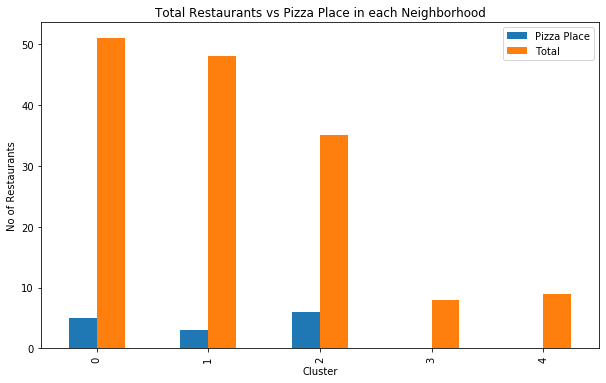

In [26]:
# Create a dataframe with Pizza Place and Total for creating a Bar chart

df_pizza = canada_sum[['Pizza Place','Total']]
df_pizza.plot(kind='bar',figsize=(10,6))
plt.title('Total Restaurants vs Pizza Place in each Neighborhood')
plt.ylabel('No of Restaurants')
plt.show()

__Above Bar Chart shows that Cluster 3 and Cluster 4 does not have any Pizza Restaurant. Hence this is right place to start a new Restaurant__

In [27]:
# Get the Neighborhood names in Cluster 3 and 4
# This is the recommended Neighborhood to open a Pizza Restaurant
recommend_cluster = cluster_map[cluster_map['Cluster Labels'].isin(['3','4'])]
recommend_cluster.set_index('Cluster Labels',inplace=True)
recommend_cluster.drop_duplicates().sort_values(by='Cluster Labels',axis=0)

,Neighborhood
Cluster Labels,
3,Forest Hill North
3,Forest Hill West
4,Lawrence Park
4,North Toronto West


# Neighborhood Forest Hill North, Forest Hill West in CLuster 3 and Lawrence Park and North Toronto West in CLuster 4 are the right place to start a Pizza Restaurant #